In [56]:
import pandas as pd
import numpy as np
from functions import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb
from sklearn.metrics import f1_score,precision_score
from sklearn.model_selection import StratifiedKFold

In [213]:
train = pd.read_csv('outdata/train.csv')
test = pd.read_csv('outdata/test.csv')
train.shape,test.shape

((2276822, 125), (429803, 124))

In [214]:
train

,sid,pid,o_x,o_y,d_x,d_y,ED,plan_day,plan_hour,plan_weekday,...,p59,p60,p61,p62,p63,p64,p65,p_sum,click_ratio,label
0,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360559,1.0
1,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051614,0.0
2,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029075,0.0
3,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060340,0.0
4,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659316,0.0
5,3000821,NaN,116.29,39.97,116.32,39.96,0.0010,2.0,17.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357498,0.0
6,3085857,210736.0,116.39,39.84,116.33,39.79,0.0061,16.0,10.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.329566,0.0
7,3085857,210736.0,116.39,39.84,116.33,39.79,0.0061,16.0,10.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.051614,0.0
8,3085857,210736.0,116.39,39.84,116.33,39.79,0.0061,16.0,10.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.029075,0.0
9,3085857,210736.0,116.39,39.84,116.33,39.79,0.0061,16.0,10.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.360559,0.0


In [212]:
from gensim.models import word2vec

In [221]:
train.groupby(by=['o_x','o_y'])['transport_mode'].value_counts().unstack().reset_index().fillna(0)

tmp = train.groupby(by=['o_x','o_y'])['transport_mode'].value_counts().unstack().fillna(0).apply(lambda x:list(x),axis=1).reset_index()
train = train.merge(tmp.rename(columns={0:'mode_counts'}),how='left',on=['o_x','o_y'])
train.head(2)

transport_mode,o_x,o_y,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,115.47,39.78,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,115.49,39.98,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,115.50,40.03,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,115.50,40.04,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,115.51,39.93,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,115.56,40.00,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,115.57,39.99,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,115.58,39.78,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,115.59,39.63,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9,115.59,39.64,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [259]:
train.groupby(by=['o_x','o_y'])['transport_mode'].value_counts().name

'transport_mode'

In [239]:
train.groupby(by=['o_x','o_y'])['transport_mode'].unique()

o_x     o_y  
115.47  39.78                        [3.0, 4.0, 1.0]
115.49  39.98                        [7.0, 3.0, 4.0]
115.50  40.03                   [3.0, 4.0, 7.0, 1.0]
        40.04                  [3.0, 4.0, 1.0, 11.0]
115.51  39.93                        [3.0, 4.0, 7.0]
115.56  40.00                   [6.0, 3.0, 4.0, 5.0]
115.57  39.99                        [3.0, 4.0, 1.0]
115.58  39.78              [3.0, 4.0, 7.0, 8.0, 1.0]
115.59  39.63         [3.0, 4.0, 7.0, 1.0, 5.0, 6.0]
        39.64                             [1.0, 7.0]
115.60  39.63                        [1.0, 3.0, 4.0]
        39.64                   [7.0, 3.0, 4.0, 1.0]
115.61  39.65              [3.0, 4.0, 6.0, 1.0, 5.0]
        39.95              [3.0, 4.0, 7.0, 1.0, 6.0]
115.62  39.94                        [3.0, 4.0, 1.0]
115.63  39.75                             [3.0, 1.0]
        39.83                   [3.0, 4.0, 8.0, 1.0]
115.66  39.63              [7.0, 3.0, 4.0, 8.0, 1.0]
        39.97                   

### lgb 模型二分类

In [47]:
#模型评估指标 f1
#自定义各类别f1权重
weights=test['transport_mode'].value_counts().values
def multiclass_f1(y_true,y_pred,weights=weights):
    f1_list = f1_score(y_true,y_pred,average=None)
    f1_fina = np.sum(f1_list * weights) / weights.sum()
    return f1_fina
def f1_valid(valid_df,y_valid,post_process_flag=True,f1_weight):
    #without post processing
    valid_tmp = valid_df.copy()
    valid_tmp['pre_label'] = y_valid
    valid_tmp['pre_label_order'] = valid_tmp.groupby('sid')['pre_label'].rank(method='min',ascending=False)
    valid_true = valid_tmp[valid_tmp['label']==1]['transport_mode']
    valid_pred = valid_tmp[valid_tmp['pre_label_order']==1]['transport_mode']
#     f1_value_1 = f1_score(valid_true.values,valid_pred.values,average='weighted')
    f1_value_1 = multiclass_f1(valid_true.values,valid_pred.values）
    mat = plot_confusion_matrix(valid_true.values, valid_pred.values, classes_name=np.sort(valid_true.unique()), normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
#     valid_pred.value_counts().sort_index().plot(kind='bar',title='valid_pre_model_1')
    
    #with post processing
    f1_value_2 = 0
    if post_process_flag:
        proces_model = [2,1,7,4,3,6]
        proces_weight = [0.9,0.8,0.8,3,2,2]
        for i in range(len(proces_model)):
            valid_tmp.loc[valid_tmp[valid_tmp['transport_mode']==proces_model[i]].index,'pre_label'] = valid_tmp['pre_label']* proces_weight[i]
        valid_tmp['pre_label_order'] = valid_tmp.groupby('sid')['pre_label'].rank(method='min',ascending=False)
        valid_pred = valid_tmp[valid_tmp['pre_label_order']==1]['transport_mode']
        f1_value_2 = multiclass_f1(valid_true.values,valid_pred.values）
        mat = plot_confusion_matrix(valid_true.values, valid_pred.values, classes_name=np.sort(valid_true.unique()), normalize=True,
                      title='Normalized confusion matrix with process')
        plt.show()
#         valid_pred.value_counts().sort_index().plot(kind='bar',title='valid_pre_model_2')
    
    return (f1_value_1,f1_value_2)

In [48]:
#lgb 参数
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', 
                               num_leaves=395, 
                               reg_alpha=3, 
                               reg_lambda=5, 
                               max_depth=-1,
                               n_estimators=500, 
                               objective='binary', 
                               subsample=0.9, 
                               colsample_bytree=0.77, 
                               subsample_freq=1, 
                               learning_rate=0.1,
                               random_state=1000, 
                               n_jobs=16, 
                               min_child_weight=4, 
                               min_child_samples=5, 
                               min_split_gain=0)
fold_num = 5
skf = StratifiedKFold(n_splits=fold_num, random_state=2018, shuffle=True)

#以sid，transport_mode比例划分训练测试集
auc_value = []
f1_value = []
test_preds = np.zeros(test.shape[0])
train_sub = train[train['label']==1][['sid','transport_mode']]
for index, (train_index, valid_index) in enumerate(skf.split(train_sub, train_sub['transport_mode'])):
    print("flod_num:%d" %index)  
    train_df = train[train['sid'].isin(train_sub.iloc[train_index,0].values)]
    valid_df = train[train['sid'].isin(train_sub.iloc[valid_index,0].values)]
    lgb_model.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1], 
                  verbose=100,
                  eval_metric='auc',
                  eval_set=[(valid_df.iloc[:,:-1], valid_df.iloc[:,-1])],
                  early_stopping_rounds=100,
                  eval_class_weight=['balanced','balanced'])
    
    auc_value.append(lgb_model.best_score_['valid_0']['auc'])
    print('auc_value:\n',auc_value)
    
    #f1多分类验证
    y_valid = lgb_model.predict_proba(valid_df.iloc[:,:-1], num_iteration=lgb_model.best_iteration_)[:, 1]
    f1_value.append(f1_valid(valid_df,y_valid))
    
#     valid_df['pre_label'] = y_valid
#     valid_df['pre_label_order'] = valid_df.groupby('sid')['pre_label'].rank(method='min',ascending=False)
#     valid_true = valid_df[valid_df['label']==1]['transport_mode']
#     valid_pred = valid_df[valid_df['pre_label_order']==1]['transport_mode']
#     f1_value.append(f1_score(valid_true.values,valid_pred.values,average='weighted'))
    print("f1_score:\n",f1_value)
        
    #测试集预测
    y_test = lgb_model.predict_proba(test, num_iteration=lgb_model.best_iteration_)[:, 1]
    test_preds += y_test / fold_num

In [12]:
#测试结果后处理 0423
testDF = test.copy()
testDF['pre_label'] = pd.Series(y_test)

In [13]:
#测试结果后处理 0424
testDF.loc[testDF[testDF['transport_mode']==1].index,'pre_label'] = testDF['pre_label']*0.8
testDF.loc[testDF[testDF['transport_mode']==7].index,'pre_label'] = testDF['pre_label']*0.8
testDF.loc[testDF[testDF['transport_mode']==4].index,'pre_label'] = testDF['pre_label']*3
testDF.loc[testDF[testDF['transport_mode']==3].index,'pre_label'] = testDF['pre_label']*2
testDF.loc[testDF[testDF['transport_mode']==6].index,'pre_label'] = testDF['pre_label']*2
# testDF.loc[testDF[(testDF['plan_order']==1) & (testDF['transport_mode'].isin([3,4,6]))].index,'pre_label'] = testDF['pre_label']*1.2

In [14]:
#分组取概率最大的model
testDF['pre_label_order'] = testDF.groupby('sid')['pre_label'].rank(method='min',ascending=False)
test_out = testDF[testDF['pre_label_order']==1][['sid','transport_mode','pre_label','pre_label_order']]
test_out['transport_mode'].value_counts()

2.0     33594
7.0     21474
1.0     16602
5.0     10480
10.0     3340
3.0      2460
4.0      2158
9.0      1146
8.0       521
6.0       505
11.0      291
Name: transport_mode, dtype: int64

In [16]:
#预测概率阈值 置0
pd.cut(test_out['pre_label'],[x*0.1 for x in range(11)]).value_counts().sort_index()
test_out.loc[test_out[test_out['pre_label']<0.2].index,'transport_mode']=0
test_out['transport_mode'].value_counts()

2.0     33593
7.0     21472
1.0     16597
5.0     10480
10.0     3338
3.0      2454
4.0      2157
9.0      1144
8.0       511
6.0       505
11.0      286
0.0        34
Name: transport_mode, dtype: int64

In [26]:
test_out = test_out.rename(columns={'transport_mode':'recommend_mode'})
test_out['recommend_mode'] =test_out['recommend_mode'].astype(int)
result = test_out[['sid','recommend_mode']]
result.to_csv('submission/submission20190425_1.csv',index=None)

In [28]:
result.to_csv('submission/submission20190425_1.csv',index=None)

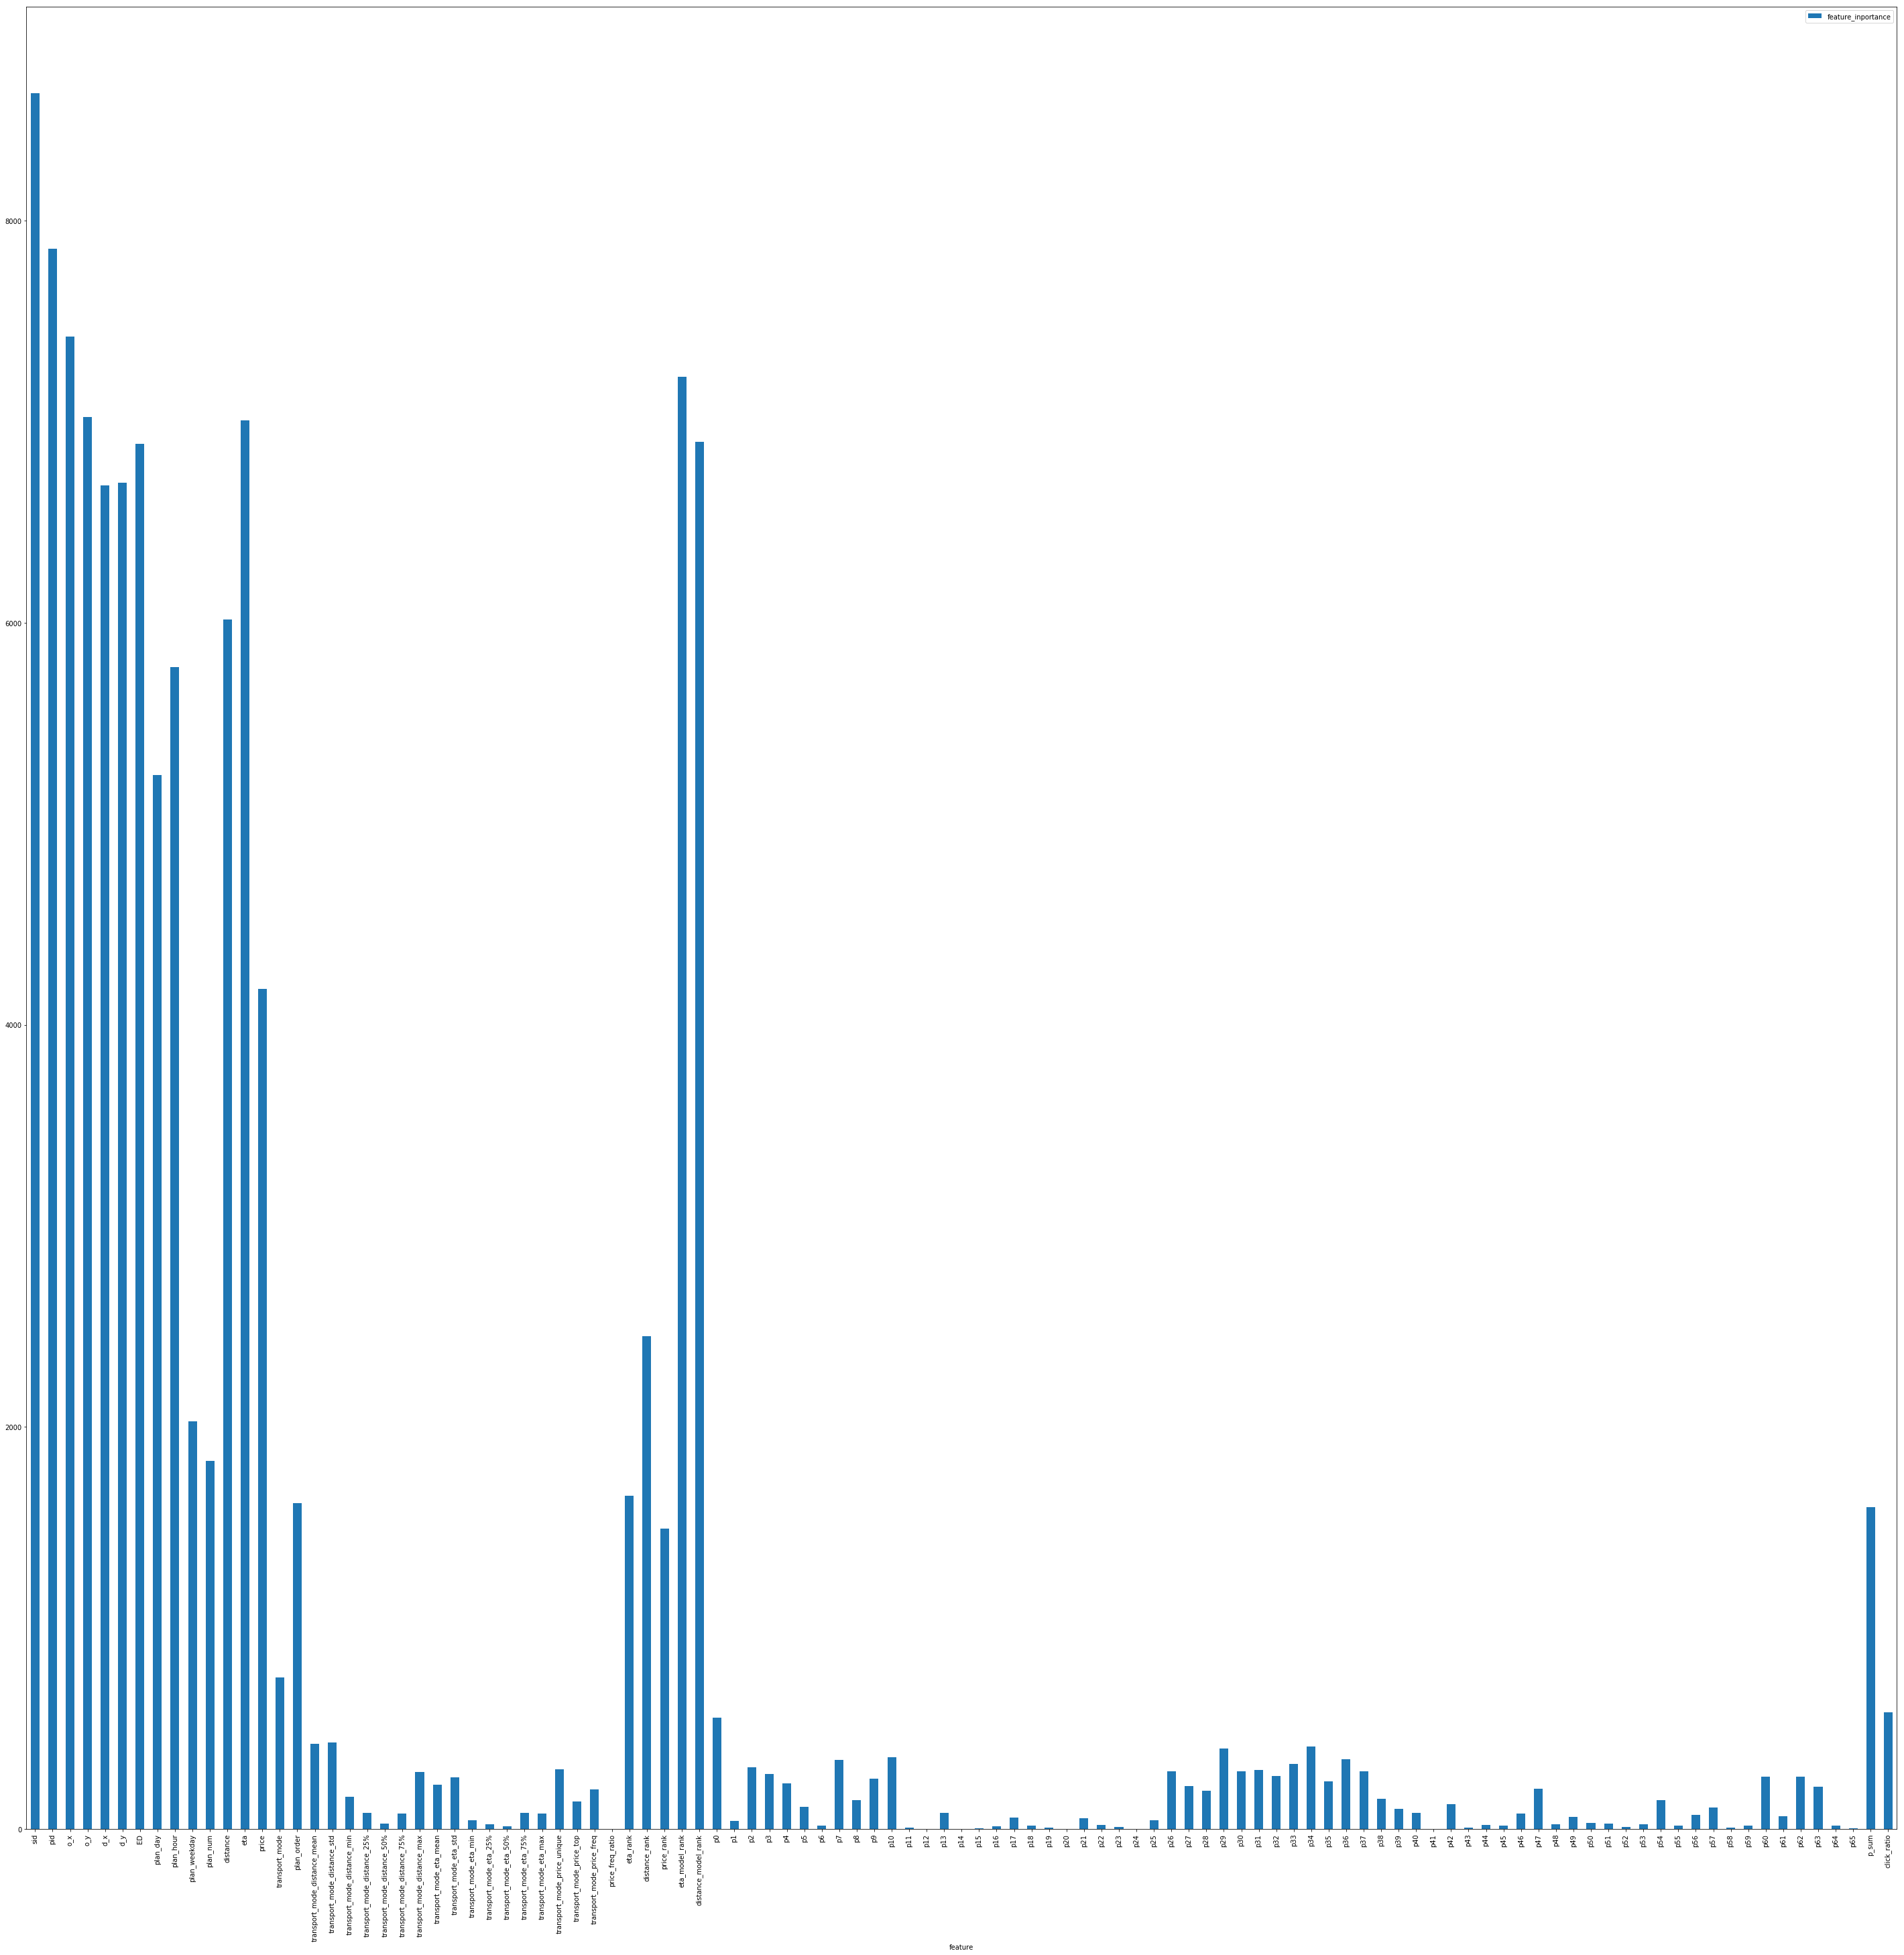

In [27]:
#特征重要性排序
tmp = pd.DataFrame(test.columns,columns=['feature'])
tmp['feature_inportance'] = lgb_model.feature_importances_
tmp.plot(x='feature',y='feature_inportance',kind='bar',figsize=(50, 50))

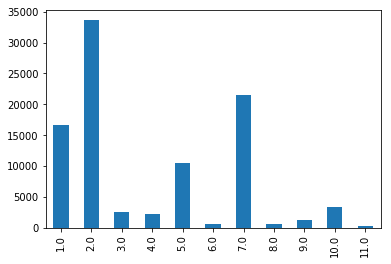

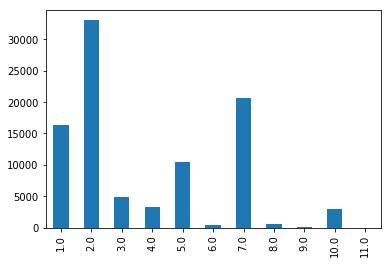

In [21]:
#后处理分析
# testDF['pre_label_order'] = testDF.groupby('sid')['pre_label'].rank(method='min',ascending=False)
# testDF[testDF['pre_label_order']==1]['transport_mode'].value_counts().sort_index().plot(kind='bar')
# plt.show()
# testDF[testDF['pre_label_order']==1]['transport_mode'].value_counts() / testDF[testDF['pre_label_order']==1].shape[0]
# testDF[testDF['plan_order']==1]['transport_mode'].value_counts().sort_index().plot(kind='bar')

### lgb 多分类模型

In [113]:
#读取数据
train = pd.read_csv('outdata/train_mult.csv')
train['label'].fillna(0,inplace=True)
test = pd.read_csv('outdata/test_mult.csv')
train.shape,test.shape

((491054, 401), (92571, 400))

In [119]:
#lgb 参数
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', 
                               num_leaves=395, 
                               reg_alpha=3, 
                               reg_lambda=5, 
                               max_depth=-1,
                               n_estimators=500, 
                               objective='multiclass', 
                               num_class = 12,
                               class_weight ='balanced',
                               subsample=0.9, 
                               colsample_bytree=0.77, 
                               subsample_freq=1, 
                               learning_rate=0.1,
                               random_state=1000, 
                               n_jobs=20, 
                               min_child_weight=4, 
                               min_child_samples=5, 
                               min_split_gain=0)
fold_num = 5
skf = StratifiedKFold(n_splits=fold_num, random_state=2018, shuffle=True)

In [120]:
#以sid，transport_mode比例划分训练测试集
f1_value = []
cv_pred = []    # 各fold的预测值
for index, (train_index, valid_index) in enumerate(skf.split(train.iloc[:,:-1], train.iloc[:,-1])):
    print("flod_num:%d" %index)  
    train_df = train.iloc[train_index,:]
    valid_df = train.iloc[valid_index,:]
    lgb_model.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1], 
                  verbose=100,
#                   eval_metric='auc',
                  eval_set=[(valid_df.iloc[:,:-1], valid_df.iloc[:,-1])],
                  early_stopping_rounds=100)
    
    #f1多分类验证
    y_valid = lgb_model.predict_proba(valid_df.iloc[:,:-1], num_iteration=lgb_model.best_iteration_)
    x_pred = [np.argmax(x) for x in x_pred]
#     y_pred = np.argmax(y_valid.reshape(12, -1), axis=0)   
    f1_value.append(multiclass_f1(valid_df.iloc[:,-1].values,y_pred))
    print("f1_score:\n",f1_value)
        
    #测试集预测
    y_test = lgb_model.predict_proba(test, num_iteration=lgb_model.best_iteration_)
    
    test_preds += y_test / fold_num
    y_test = clf.predict(X_test, num_iteration=clf.best_iteration)  # 预测
    y_test = [np.argmax(x) for x in y_test]
    if index == 0:
        cv_pred = np.array(y_test).reshape(-1, 1)
    else:
        cv_pred = np.hstack((cv_pred, np.array(y_test).reshape(-1, 1)))
    if index == 4:
        lgb.plot_importance(clf, figsize=(50, 50))  # 画出重要特征
        plt.title("Feature_importance")
        plt.show()
    y_test = [np.argmax(x) for x in y_test]

flod_num:0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's multi_logloss: 1.01298
[200]	valid_0's multi_logloss: 0.975231
[300]	valid_0's multi_logloss: 0.961704
[400]	valid_0's multi_logloss: 0.958536
[500]	valid_0's multi_logloss: 0.961446
Did not meet early stopping. Best iteration is:
[403]	valid_0's multi_logloss: 0.958521


NameError: name 'x_pred' is not defined

### lgb 多分类

In [175]:
# lgb 参数
lgb_params = {
    "learning_rate": 0.05,
    "lambda_l1": 0.1,
    "lambda_l2": 0.2,
    "max_depth": 7,
    "num_leaves": 120,
    "objective": "multiclass",
    "num_class": 12,
    "verbose": -1,
    'feature_fraction': 0.8,
    "min_split_gain": 0.1,
    "boosting_type": "gbdt",
    "subsample": 0.8,
    "min_data_in_leaf": 50,
    "colsample_bytree": 0.7,
    "colsample_bylevel": 0.7,
    "tree_method": 'exact'
}
#自定义各类别f1权重
weights=train['label'].value_counts().values
def multiclass_f1(y_true,y_pred,weights=weights):
    f1_list = f1_score(y_true,y_pred,average=None)
    f1_fina = np.sum(f1_list * weights) / weights.sum()
    return f1_fina
# 自定义F1评价函数
def f1_score_vail(pred, data_vail):
    labels = data_vail.get_label()
    pred = np.argmax(pred.reshape(12, -1), axis=0)      # lgb的predict输出为各类型概率值
#     print (pred)
#     score_vail = multiclass_f1(y_true=labels, y_pred=pred)
    f1_list = f1_score(labels,pred,average=None)
    score_vail = np.sum(f1_list * weights) / weights.sum()
    return 'f1_score', score_vail, True

In [208]:
y_pred = clf.predict(X_train.iloc[test_index])
y_pred

array([[0.07719104, 0.13899065, 0.26810083, ..., 0.09664145, 0.02949013,
        0.01207171],
       [0.07632967, 0.13904758, 0.26821647, ..., 0.09668313, 0.03341099,
        0.01207691],
       [0.07519964, 0.14055127, 0.29650617, ..., 0.09793081, 0.02935785,
        0.01201756],
       ...,
       [0.07695916, 0.14256744, 0.26729547, ..., 0.09635115, 0.02940154,
        0.01203544],
       [0.07637841, 0.13997255, 0.26798378, ..., 0.12053611, 0.03061149,
        0.01206635],
       [0.08720512, 0.1589198 , 0.26588141, ..., 0.09584142, 0.029246  ,
        0.01197177]])

In [210]:
np.argmax(y_pred.reshape(12, -1),axis=0)    

array([ 0,  3,  9, ..., 10,  7,  9])

In [206]:
def f1_score_vail(y_prtmped,data_vail):
    labels = data_vail.get_label()
    weights=np.array([0.087688,0.146176,0.311636,0.043999,0.024204,0.098518,0.019960,
                     0.175887,0.004793,0.051244,0.028595,0.007300])
    f1_list = f1_score(labels,np.argmax(y_prtmped.reshape(12, -1), axis=0),average=None)  
    score_vail = np.sum(f1_list * weights) 
    return 'f1_score', score_vail, True

In [201]:
oof_preds = np.zeros((X_train.shape[0],12))
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
for index, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    train_lgb_data = lgb.Dataset(X_train.iloc[train_index], label=y_train.iloc[train_index])
    validation_lgb_data = lgb.Dataset(X_train.iloc[test_index], label=y_train.iloc[test_index])
    
    clf = lgb.train(lgb_params, train_lgb_data,feval=f1_score_vail,
                num_boost_round=1, 
                valid_sets=[train_lgb_data, validation_lgb_data],
                early_stopping_rounds=100, verbose_eval=100)
    best_score.append(clf.best_score['valid_1']['f1_score'])
    print(best_score)
    oof_preds[test_index] = clf.predict(X_train.iloc[test_index],num_iteration=clf.best_iteration)
    
    pre = clf.predict(pre_data,num_iteration=clf.best_iteration)
    temp = pd.concat([pre_test,pd.DataFrame(pre)],axis=1)
    result_pre = pd.concat([result_pre,temp],axis=0,ignore_index=True)    

TypeError: 'list' object is not callable

In [176]:
#lgb train 
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
f1_score =[]
cols = ['class_'+str(i) for i in range(12)]
for index, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(index)
    X_train, X_valid, y_train, y_valid = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    train_data = lgb.Dataset(X_train, label=y_train)    # 训练数据
    validation_data = lgb.Dataset(X_valid, label=y_valid)   # 验证数据
    
    clf = lgb.train(lgb_params, train_data, 
                    num_boost_round=1000,
                    valid_sets=[validation_data],
                    early_stopping_rounds=10, 
                    feval=f1_score_vail, 
                    verbose_eval=100)   
    
    #验证集
    x_pred = clf.predict(X_valid, num_iteration=clf.best_iteration)
    x_pred = [np.argmax(x) for x in x_pred]
    f1_score.append(multiclass_f1(y_valid, x_pred))  # 计算f1值
    print('f1_score:\n',f1_score)
    #混淆矩阵
    plot_confusion_matrix(y_valid, x_pred, classes_name=np.sort(y_valid.unique()), normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
    
    #预测集
    y_test = clf.predict(test, num_iteration=clf.best_iteration)  # 预测
    if index == 0:
        test_preDF = pd.DataFrame(y_test,index=test['sid'].values,columns=cols)
    else:
        test_preDF = pd.concat([test_preDF,pd.DataFrame(y_test,index=test['sid'].values,columns=cols)],axis=0)


0
[2 2 2 ... 2 2 2]


TypeError: 'list' object is not callable

In [127]:
lgb.plot_importance(clf, figsize=(50, 50))  # 画出重要特征
plt.title("Feature_importance")
plt.show()

array([18., 10., 16., 14., 12., 11., 19.,  9., 15., 13., 20., 17.])

In [133]:
y_test = pd.DataFrame(index=test['sid'].values)
y_test['tmp'] = [1]*y_test.shape[0]
pd.concat([y_test,y_test],axis=0)

,tmp
1126541,1
453685,1
2066073,1
452746,1
1431672,1
1362848,1
2043270,1
1404698,1
1365075,1
1344781,1


In [145]:
test_preDF = pd.DataFrame( np.random.rand(92571,12),index=test['sid'].values,columns=['class_'+str(i) for i in range(12)])
test_preDF
pd.DataFrame(index=test['sid'].values)

""
1126541
453685
2066073
452746
1431672
1362848
2043270
1404698
1365075
1344781


In [121]:
weights=test['transport_mode'].value_counts().values
def multiclass_f1(y_true,y_pred,weights=weights):
    f1_list = f1_score(y_true,y_pred,average=None)
    f1_fina = np.sum(f1_list * weights) / weights.sum()
    return f1_fina

KeyError: 'transport_mode'

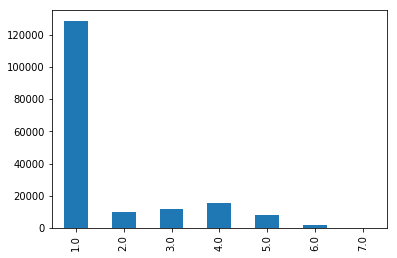

In [7]:
#plan order 影响
train[train['label']==1]['plan_order'].value_counts().sort_index().plot(kind='bar')

In [10]:
train[train['label']==1]['plan_order'].value_counts()/train[train['label']==1].shape[0]*1.0

1.0    0.731155
4.0    0.089064
3.0    0.067507
2.0    0.056964
5.0    0.045313
6.0    0.009594
7.0    0.000403
Name: plan_order, dtype: float64

In [13]:
ivs = calc_ivs(train)
pd.DataFrame.from_dict([ivs]).T

/home/cwl/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,0
ED,0.003379
click_ratio,1.527365
d_x,0.000212
d_y,0.000446
distance,0.006345
distance_model_rank,0.200181
distance_rank,0.043563
eta,0.030820
eta_model_rank,0.250179
eta_rank,0.567054


In [16]:
pd.DataFrame.from_dict([ivs]).T.sort_values(0,ascending=False)

,0
plan_order,2.204336
transport_mode_eta_max,1.527365
transport_mode_eta_50%,1.527365
transport_mode_eta_25%,1.527365
transport_mode_price_freq,1.527365
transport_mode_distance_75%,1.527365
transport_mode_distance_mean,1.527365
transport_mode_eta_std,1.527365
transport_mode_distance_std,1.527365
transport_mode_eta_mean,1.527365


In [21]:
woe_df = calc_woe(train,'plan_order')
woe_df

,name,good_num,good_ratio,bad_num,bad_ratio,woe,iv
0,1.0,61918,0.087538,128714,0.731155,2.122555,1.366113
1,2.0,180280,0.254874,10028,0.056964,-1.498357,0.296541
2,3.0,175743,0.248460,11884,0.067507,-1.303056,0.235793
3,4.0,143356,0.202672,15679,0.089064,-0.822236,0.093413
4,5.0,100775,0.142473,7977,0.045313,-1.145555,0.111302
5,6.0,41804,0.059101,1689,0.009594,-1.818082,0.090008
6,7.0,3453,0.004882,71,0.000403,-2.493546,0.011167


In [23]:
train['sid'].unique()

array([3000821, 3085857, 2944522, ..., 1687706, 3144997, 3326591])